1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [14]:
import numpy as np
import math 
m = np.arange(12).reshape((3,4)) #initializing
print(m)

#Total Mean
print('Total mean =',m.mean())

#Computing and printing the mean of rows
for i in range (3):
    print('The mean of the row ', i, 'is =', m[i].mean())
   
#Computing and printing the mean of columns    
for i in range (4):
    print('The mean of the column', i, 'is =', m[:,i].mean())


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean = 5.5
The mean of the row  0 is = 1.5
The mean of the row  1 is = 5.5
The mean of the row  2 is = 9.5
The mean of the column 0 is = 4.0
The mean of the column 1 is = 5.0
The mean of the column 2 is = 6.0
The mean of the column 3 is = 7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
#Outer Product using 'np.outer' function

u = np.array([1, 3, 5, 7]) 
v = np.array([2, 4, 6, 8])

print(np.outer(u, v, out=None))

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [36]:
import numpy as np
#Outer Product using 'for loop'
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
a = []
for i in range (len(u)):
    for j in range (len(v)):
        val = u[i]*v[j]
        a.append(val)    
        
m = np.array(a).reshape(4,4)
print(m)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [8]:
#Outer Product using 'broadcasting'
u = np.array([1, 3, 5, 7]) 
v = np.array([2, 4, 6, 8])
a = np.array(u[:, np.newaxis] * v)
print(a)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [67]:
import numpy.random as npr
import numpy.ma as ma

#init an Array of size 10x6
a = npr.rand(10, 6)*3 
print('The array is : \n', a,'\n')

#Mask the Array with the above mentioned condition
b = ma.masked_less_equal(a, 0.3)
print('The masked array is : \n', b, '\n')


#Fill the gaps with zeros
b = b.filled(0)
print('The array with masked values raplaced by zero is : \n', b)

The array is : 
 [[1.68003662 2.65862106 0.30127843 1.29404874 0.05593737 0.13164028]
 [1.03938473 0.54531179 1.21247498 1.9050561  0.33885782 2.9827912 ]
 [0.95159832 0.80387999 1.49356877 1.47215645 2.94582834 1.00080542]
 [2.58990384 2.59124634 1.25947699 0.76046602 1.76300065 2.51533097]
 [1.0894236  1.90044212 2.40445492 1.32266182 0.55620118 2.31644088]
 [2.90722934 0.08673775 1.67556242 1.21556712 0.25983404 1.06599574]
 [0.7750986  1.76207125 0.00627611 2.94701214 0.87303068 2.83788015]
 [2.75221302 1.15697847 2.70936132 1.53835653 1.12793468 1.79534402]
 [1.37076485 1.58812007 2.72470271 0.09349683 1.20681446 0.27738027]
 [2.09995092 2.11894439 2.0767492  2.29800596 0.41506297 2.22791243]] 

The masked array is : 
 [[1.6800366182423265 2.658621058121977 0.30127843096828877
  1.2940487408309633 -- --]
 [1.0393847311540332 0.545311785010556 1.212474982624585
  1.905056102822353 0.33885781913726165 2.9827911975422596]
 [0.9515983204172422 0.8038799938666035 1.49356877078601
  1.4

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

In [19]:
import math as m

#Init the array with the above condition
a = np.linspace(0, 2*(math.pi), num=100)
print('a = \n',a)

a = 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.

In [22]:
#To Extract every 10th element using the slice notation
print(a[9:100:10])


[0.57119866 1.20586385 1.84052903 2.47519421 3.10985939 3.74452458
 4.37918976 5.01385494 5.64852012 6.28318531]


In [52]:
#Reverse the array using the slice notation
print(a[::-1])

#Reverse using Numpy.flip()
b = np.reshape(a, (10,10))
print(np.flip(b))

print(len(a))

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26933037 1.20586385 1.14239733 1.07893081 1.01546429
 0.95199777 0.88853126 0.82506474 0.76159822 0.6981317  0.634665

In [67]:
#Extract elements where the absolute difference between the sin and cos functions evaluated for that element is  <0.1
n=0
for i in range (len(a)):
    
    if (abs((np.sin(a[i]))-np.cos(a[i])))<0.1 :
    
        print('a[',i,'] = ', a[i],'and the Absolute difference is =', abs((np.sin(a[i]))-np.cos(a[i])))
        n=n+1
        
    else:
        
        pass
    
print('Total Number of elements extracted from array = ', n)      

a[ 12 ] =  0.7615982190520711 and the Absolute difference is = 0.03365502662295816
a[ 13 ] =  0.8250647373064104 and the Absolute difference is = 0.056082297100401135
a[ 61 ] =  3.8714576135146945 and the Absolute difference is = 0.07849544915946327
a[ 62 ] =  3.934924131769034 and the Absolute difference is = 0.011219283672541658
Total Number of elements extracted from array =  4


In [15]:
a=math.pi
print(a)

3.141592653589793


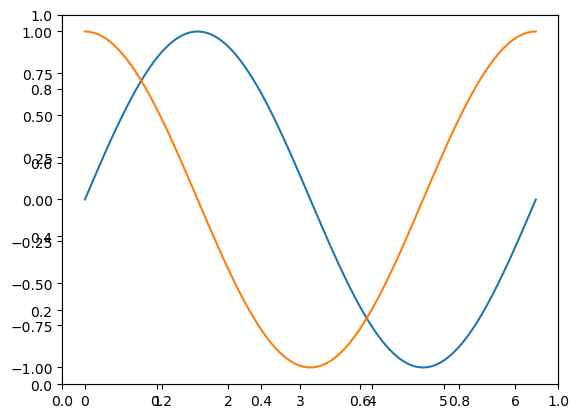

In [26]:
#Optional: make a plot showing the sin and cos functions and indicate where they are close
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
bx = fig.add_subplot()

X = np.linspace(0, 2*a, 100)
Y1 = np.sin(X)
Y2 = np.cos(X)

plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))



5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [73]:
import numpy as np
import math as m 

#Init the array
u = np.array([1,2,3,4,5,6,7,8,9,10])
x = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
v = u*x
print('The Matrix of 10x10 Multiplication table is: \n', v)

#Trace of a Matrix
print('\n Trace of the matrix is = ', np.trace(v))

#Extract the anti-diagonal matrix (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10]))



The Matrix of 10x10 Multiplication table is: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

 Trace of the matrix is =  385


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)